Natural Language Processing Project

Spam Detection

Model
- LSTM + GlobalMaxPooling1D



In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pylab
import pandas as pd

In [16]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [17]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
#Drop the unnecessary columns
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#Rename the columns
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#Create binary label
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [25]:
#Split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [26]:
#Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [29]:
#Get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7079 unique tokens.


In [30]:
#pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

#get sequence length
T = data_train.shape[1]



Shape of data train tensor: (3733, 189)


In [31]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


Create the model

In [33]:
#get to choose embedding dimensionality
D = 20

#Hidden state dimensionalut
M = 15
'''
Note: we actually want to the size of the embedding to (V+1) x D,
becuase the first index starts from 1 and not 0.
Thus, if the final index of the ebedding matrix is V,
then it actually must have size V + 1
'''

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

Compile and Fit

In [35]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
r = model.fit(
    data_train, 
    Ytrain, 
    epochs=10,
    validation_data=(data_test, Ytest)
)



Training model...
Epoch 1/10
117/117 [==============================] - 18s 125ms/step - loss: 0.4691 - accuracy: 0.8645 - val_loss: 0.3901 - val_accuracy: 0.8554
Epoch 2/10
117/117 [==============================] - 13s 113ms/step - loss: 0.2882 - accuracy: 0.8711 - val_loss: 0.2652 - val_accuracy: 0.8554
Epoch 3/10
117/117 [==============================] - 15s 125ms/step - loss: 0.2072 - accuracy: 0.8711 - val_loss: 0.1987 - val_accuracy: 0.8554
Epoch 4/10
117/117 [==============================] - 13s 114ms/step - loss: 0.1469 - accuracy: 0.9467 - val_loss: 0.1404 - val_accuracy: 0.9831
Epoch 5/10
117/117 [==============================] - 16s 139ms/step - loss: 0.1002 - accuracy: 0.9957 - val_loss: 0.1068 - val_accuracy: 0.9880
Epoch 6/10
117/117 [==============================] - 16s 137ms/step - loss: 0.0732 - accuracy: 0.9976 - val_loss: 0.0911 - val_accuracy: 0.9864
Epoch 7/10
117/117 [==============================] - 13s 113ms/step - loss: 0.0543 - accuracy: 0.9984 - val_los

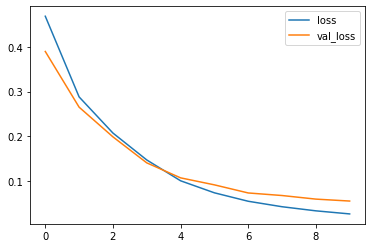

In [37]:
#Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

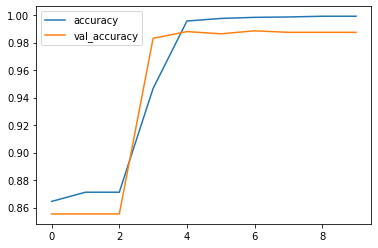

In [38]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label="accuracy")
plt.plot(r.history['val_accuracy'], label="val_accuracy")
plt.legend()